In [10]:
# Standard library imports
import os
import time
import warnings
import random
import glob
import pickle
from pathlib import Path
from typing import Tuple, Dict, List

# Third-party imports
import numpy as np
import pandas as pd
import requests
import zipfile
import cv2
from PIL import Image
from skimage import io, transform
from skimage.feature import hog
from skimage import data, exposure
from skimage.color import rgb2gray

# Data visualization
import matplotlib.pyplot as plt
plt.ion()  # interactive mode

# Ignore warnings
warnings.filterwarnings("ignore")

In [11]:
def load_pickle_image(file_path):
    with open(file_path, "rb") as f:         
        return pickle.load(f)                 

# Get all .pck file paths (don't load all images at once - too memory intensive!)
file_paths = []                              
for vol in range(1, 9):                      
    folder = f"archive/vol{vol:02d}"         
    file_paths += sorted(glob.glob(f"{folder}/*.pck"))  

print(f"Found {len(file_paths)} total image files")
# Load images individually as needed, not all at once

Found 736 total image files


archive/vol01 directory exists.


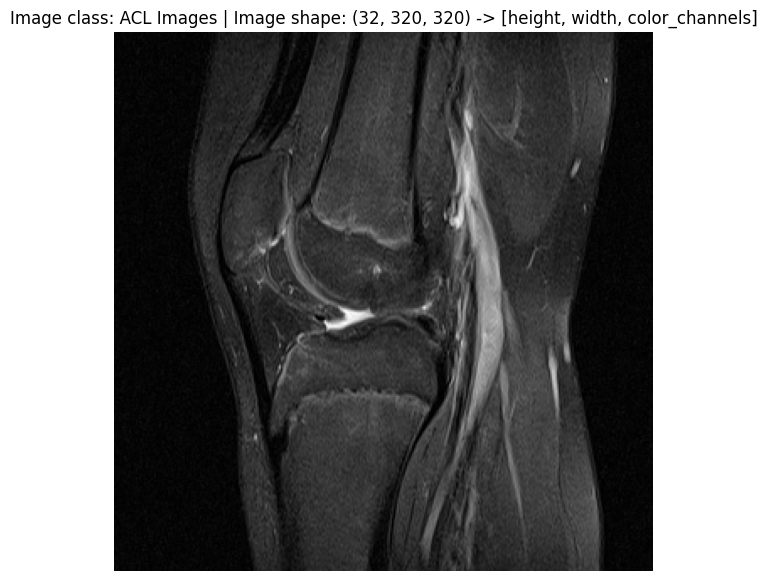

In [ ]:
# Setup path to data folder
data_path = Path("archive/")
image_path = data_path / "vol01"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory exists.")

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(glob.glob(f"{folder}/*.pck"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = "ACL Images"

# 4. Open image
img = load_pickle_image(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array[16], cmap='gray')
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)


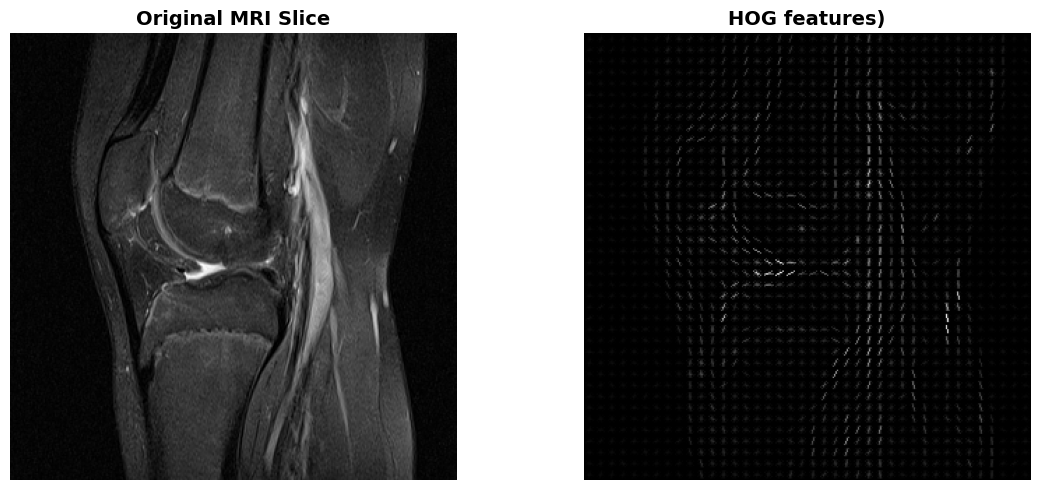

In [ ]:
image = load_pickle_image(random_image_path)
img_array = np.asarray(image)

gray_image = img_array[16]

fd, hog_image = hog(
        gray_image,
        orientations=9,          
        pixels_per_cell=(8, 8),  
        cells_per_block=(2, 2),  
        visualize=True,
    )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title('Original MRI Slice', fontsize=14, fontweight='bold')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title(f'HOG features)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()